<a href="https://colab.research.google.com/github/FelipePinheiro964/Fase-1---estat-stica-aplicada/blob/main/Fase_1_Projeto_estatistica_aplicada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar bibliotecas


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import colors as mcolors
import seaborn as sns
import scipy.stats as stats

# Ler arquivo e exibir para definir dados de cada tabela

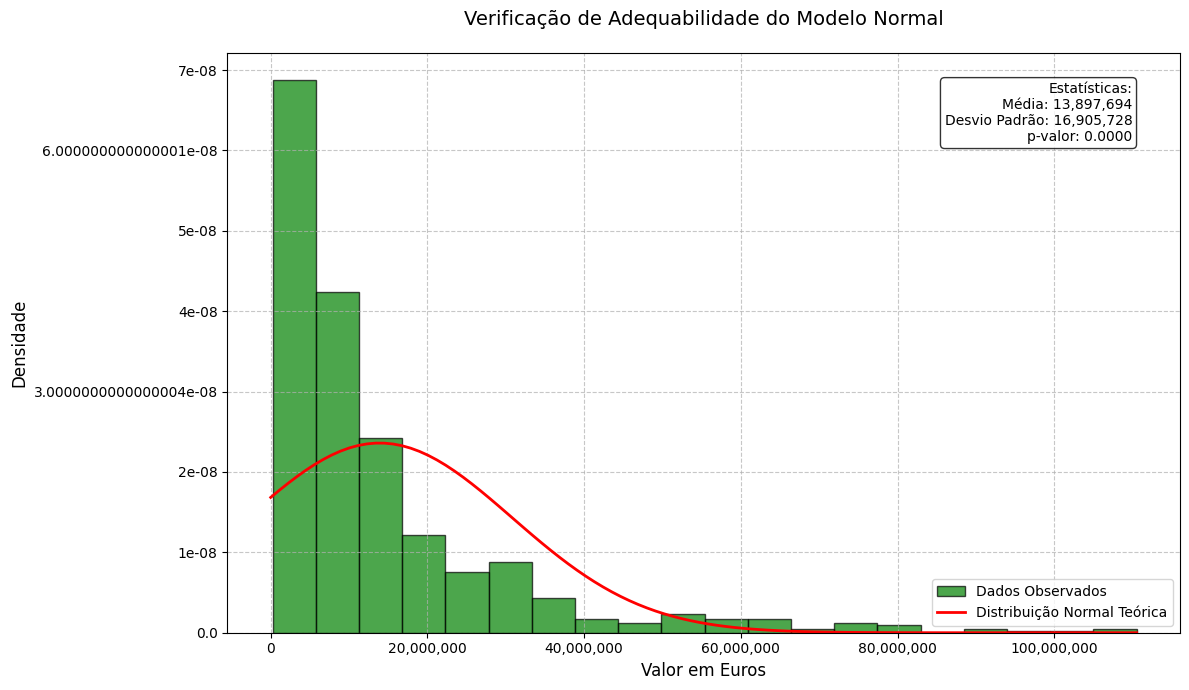


Estatísticas Descritivas:


,value_euro
count,7.180000e+02
mean,1.389769e+07
std,1.691751e+07
min,2.300000e+05
25%,3.325000e+06
50%,8.000000e+06
75%,1.700000e+07
max,1.105000e+08


In [24]:
def carregar_dados_iniciais():
    f = "fifa.csv"
    dados_fifa = pd.read_csv(f, sep=",")

    return dados_fifa

def exibir_tabela(dados_fifa):
    # pd.set_option('display.max.rows', None)
    print("tabela: ")
    display(dados_fifa)

def main():
    dados_fifa = carregar_dados_iniciais()
    # exibir_tabela(dados_fifa)
    # questao_2(dados_fifa)
    # questao_3(dados_fifa)
    questao_5(dados_fifa)

main()

# 2. Tabelas de frequência para duas variáveis qualitativas


Para a segunda questão, fiz uma funçao lendo duas colunas:

- Club_team: Qualitativa nominal
- Internacional_reputation(1-5): Qualitativa nominal

Com ajuda do pandas, fiz a contagem de frequencia de cada item presente nas colunas, colocando numa variavel. Para auxiliar a visualização, fiz 3 graficos, onde 2 deles sao da tabela Club_team, e uma da internacional_reputation.

In [ ]:
# Criando uma função
def questao_2(dados_fifa):

  # Criando uma contagem de vezes que cada time aparece dentro do arquivo
  club_counts = dados_fifa['club_team'].value_counts()
  display(club_counts)

  # Contagem de avaliacoes internacionais de jogadores
  inter_reputation_count = dados_fifa['international_reputation(1-5)'].value_counts()
  display(inter_reputation_count)

  # vou utilizar um grafico de barra para melhor visualização
  # separando entre os 10 maiores e menores para os clubes, para melhor visualização no grafico
  top_clubs = club_counts.nlargest(10)
  bottom_clubs = club_counts.nsmallest(10)
  inter_reputation_count = inter_reputation_count.nlargest(5) # mantem da mesma forma

  # grafico 1
  plt.figure(figsize=(12, 6))
  plt.subplot(1,2,1)
  top_clubs.plot(kind="bar", color="green") # cores diferentes para cada grafico
  plt.title("Clubes mais frequentes")
  plt.xlabel("Clube")
  plt.ylabel("Contagem")
  plt.xticks(rotation=85) # para leitura correta de cada barra
  plt.tight_layout()  #ajusta o grafico

  # grafico 2
  # repete o primeiro, mudando as cores
  plt.figure(figsize=(12, 6))
  plt.subplot(1,2,2)
  bottom_clubs.plot(kind="bar", color="red")
  plt.title("Clubes menos frequentes")
  plt.xlabel("Clube")
  plt.ylabel("Contagem")
  plt.xticks(rotation=85)
  plt.tight_layout()  #ajusta o grafico

  #grafico stem personalizado para vizualizar avaliações internacionais
  # utilizei o stem para personalizar o simbolo
  plt.figure(figsize=(7, 8))

  # definindo limite do eixo y do grafico, dando uma visualização mais limpa
  plt.ylim(0, max(inter_reputation_count.values) * 1.1)

  markerline, stemlines, baseline = plt.stem(
    inter_reputation_count.index, # valores eixo x
    inter_reputation_count.values,# valores eixo y
    linefmt='r-',                 # Linha azul
    markerfmt='y*',               # Estrelas amarelas
    basefmt='k-',                 # Linha base preta
    bottom=0,
    label='Avaliações'
                                            )
  # cabecalho e descricoes
  plt.title("Avaliações Internacionais", fontsize=14, pad=20)
  plt.xlabel("Nível de Avaliação", fontsize=12)
  plt.ylabel("Contagem", fontsize=12)
  plt.grid(True, linestyle='--', alpha=0.7)

  plt.setp(markerline, markersize=15) # Tamanho das estrelas
  plt.setp(stemlines, linewidth=2)    # Espessura das linhas
  plt.setp(baseline, linewidth=2)     # espessura da linha base

  # Ajustando os limites do eixo x para melhor visualização
  plt.xlim(0.5, 5.5)

  # Adicionando valores acima das estrelas
  for i, v in enumerate(inter_reputation_count.values):
      plt.text(inter_reputation_count.index[i], v, str(v),
              ha='center', va='bottom')

  plt.legend(fontsize=10)
  plt.tight_layout()  #ajusta o grafico
  plt.show()

# 3. Uma tabela com medidas de posição e variabilidade para ao menos 5 variáveis a serem escolhidas;

In [ ]:
def questao_3(dados_fifa):

  # definindo variaveis
  variaveis = ['overall_rating', 'age', 'value_euro', 'wage_euro', 'dribbling' ]
  selected_data = dados_fifa[variaveis]

  # medidas de posição
  medidas = {
      'Média': selected_data.mean().round(2),
      'Mediana': selected_data.median().round(2),
      'Moda': selected_data.mode().iloc[0].round(2),
      'Desvio Padrão': selected_data.std().round(2),
      'minimo': selected_data.min().round(2),
      'maximo': selected_data.max().round(2),
      '25%': selected_data.quantile(0.25).round(2),
      '50%': selected_data.quantile(0.50).round(2),
      '75%': selected_data.quantile(0.75).round(2)
  }

  # cria um dataframe para organizar os resultados
  medidas_df = pd.DataFrame(medidas)

  # melhora visualizaçao
  medidas_df = medidas_df.transpose()

  # evita notaçao cientifica na tabela
  medidas_df = medidas_df.map(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

  # mostra a tabela
  display(medidas_df)


# 5. Um histograma ou grafico de barras para verificação de adequabilidade do modelo probabilistico para a variavel escolhida.

In [23]:
def questao_5(dados_fifa):
  # Selecionando os dados
  variavel = ['value_euro']
  selected_data = dados_fifa[variavel]
  dados_array = selected_data.values.flatten()  # Para cálculos numpy

  # Calculando estatísticas basicas
  media = np.mean(dados_array)
  desvio_padrao = np.std(dados_array)

  # Criando pontos para a curva normal teorica
  x = np.linspace(0, np.max(dados_array), 100)
  probabilidade = stats.norm.pdf(x, media, desvio_padrao)

  # Realizando teste de normalidade
  stat, p_valor = stats.normaltest(dados_array)

  # Criando a figura
  plt.figure(figsize=(12, 7))

  # Criando o histograma normalizado
  plt.hist(dados_array,
          bins=20,
          density=True,
          alpha=0.7,
          color='green',
          edgecolor='black',
          label='Dados Observados')

  # Adicionando a curva normal teorica
  plt.plot(x, probabilidade, 'r-', lw=2, label='Distribuição Normal Teórica')

  # Configurando o grafico
  plt.title('Verificação de Adequabilidade do Modelo Normal', fontsize=14, pad=20)
  plt.xlabel('Valor em Euros', fontsize=12)
  plt.ylabel('Densidade', fontsize=12)
  plt.grid(True, linestyle='--', alpha=0.7)
  plt.legend()

  # Adicionando texto com estatisticas simples
  stats_text = (f'Estatísticas:\n'
                f'Média: {format(int(media), ",")}\n'
                f'Desvio Padrão: {format(int(desvio_padrao), ",")}\n'
                f'p-valor: {p_valor:.4f}')

  plt.text(0.95, 0.95, stats_text,
          transform=plt.gca().transAxes,
          verticalalignment='top',
          horizontalalignment='right',
          bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

  # Formatando os valores evitando notacao cientifica
  plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
  plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, p: format(y, ',')))

  # Ajustando o layout
  plt.tight_layout()

  # Exibindo o grafico
  plt.show()

  # Exibindo estatísticas descritivas
  print("\nEstatísticas Descritivas:")
  display(selected_data.describe())

Observando o histograma dos valores dos jogadores no FIFA:

A altura das barras mostra quantos jogadores têm aquele valor
A barra mais alta (no começo) indica que a maioria dos jogadores tem valor mais baixo
As barras vão diminuindo para a direita, mostrando que poucos jogadores têm valores muito altos
A linha vermelha mostra como seria se a distribuição fosse perfeitamente normal (em forma de sino)
Os dados reais não seguem exatamente essa linha vermelha, indicando que a distribuição não é normal
Isso faz sentido no futebol, pois temos muitos jogadores com valores mais baixos e poucos "craques" muito valiosos
Esta distribuição é típica no mercado do futebol, onde temos muitos jogadores com valores mais modestos e apenas alguns "superstars" com valores muito elevados.